In [558]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

# More Regression and Data Preparation

In this notebook, we will continue our regression analysis and data preparation, with a focus on examining the data through the lens of the median. 

<b>Note:</b> this dataset has the categorical values dropped, and those are important for a complete analysis, so we can expect our results to be generally not super accurate. 

In [559]:
# Load the tips dataset
df_all = sns.load_dataset("tips")
df = df_all[["total_bill", "tip", "size"]]
df.head()


,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [560]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Example - Baseline Model Accuracy

We can calculate the accuracy of a simple model, mostly as a review and as something to compare to. 

### Model Notes

For these examples, I replaced the simple Linear Regression with another model, the SGD Regressor, which is another version of linear regression. This detail doesn't matter much now, we'll see what it means soon. For now, this is just regular regression, the only difference is that the way the model does its backend calculations is different - it isn't doing that linear least squares calculation we looked at, it is using a process called gradient descent. The end result is the same, we get a model that predicts the target variable.

The reason we're using this as an example is because in 'real' models that we actually use, they are often done like this rather than the simple linear regression we looked at, so the impacts that we see here are more realistic if we use this other model type. We'll fill in the details soon. 

In [561]:
# Split data into arrays
# Shape the target so it is 1 column, not 1 dimensional
y = np.array(df["tip"]).reshape(-1, 1)
X = np.array(df[["total_bill", "size"]])
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (244, 2)
y shape: (244, 1)


In [562]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Generate model 
model = SGDRegressor().fit(X_train, y_train.ravel())
print("Score in Training:", round(model.score(X_train, y_train), 3))
print("Score in Testing:", round(model.score(X_test, y_test), 3))

Score in Training: 0.135
Score in Testing: 0.093


## Distributions Revisited

To this point we've taken a pretty basic look at distributions - what range does the data span, and what is the 'shape' of the data over that range. We use this to help us get our data ready, as this can give us some important insights into a few aspects of our data:
<ul>
<li> Are there any outliers? </li>
<li> Does the data look 'useful'? I.e. does each feature take on a range of values, or is it all the same value? </li>
<li> Are there any patterns in the data? </li>
</ul>

In addition to the distribution stuff, we also looked at the relationship of two variables at a time visualizations like a scatter plot or pair plot, and using measures like correlation and R2. This also gives us some idea of what is happening in our data:
<ul>
<li> Do individual features have a relationship with the target? If something is highly correlated with what we want to predict, that means it is likely to help us make that prediction. </li>
<li> Do features have a relationship with each other? </li>
</ul>

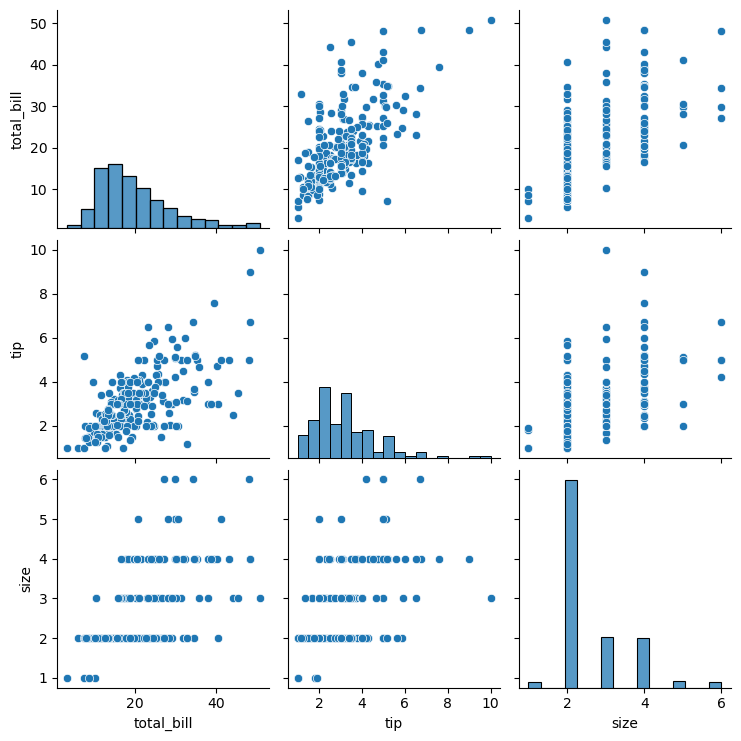

In [563]:
sns.pairplot(df)

## Median Based Analysis

The vast majority of time we use the mean as the measure of central tendency, or the average. However, the mean is very sensitive to outliers. If we are dealing with data that tends to have outliers (like income, for example), the median may be a better measure of central tendency. There are a couple of things that we can do to help us understand the data better using the median:
<ul>
<li> We can look at the median of the target variable, and compare it to the mean. If the mean is much higher than the median, that means that there are some very high values that are pulling the mean up. </li>
<li> We can look at the median of the target variable, and compare it to the median of the features. If the median of the target is much higher than the median of the features, that means that the features are not capturing the full range of the target. </li>
</ul>

This can help us understand our data better, and it can also help us start to use some other tools to improve our results. 

In [564]:
print("Target mean:", df["tip"].mean())
print("Target median:", df["tip"].median())

Target mean: 2.99827868852459
Target median: 2.9


## Visualizing the Median

In each of the total bill and tip features, we can see that the mean is higher than the median. This means that there are some high values that are pulling the mean up.

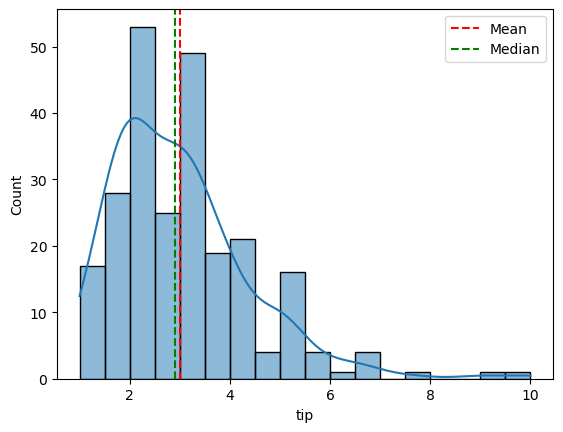

In [565]:
sns.histplot(df["tip"], kde=True)
plt.axvline(df["tip"].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df["tip"].median(), color='g', linestyle='--', label='Median')
plt.legend()


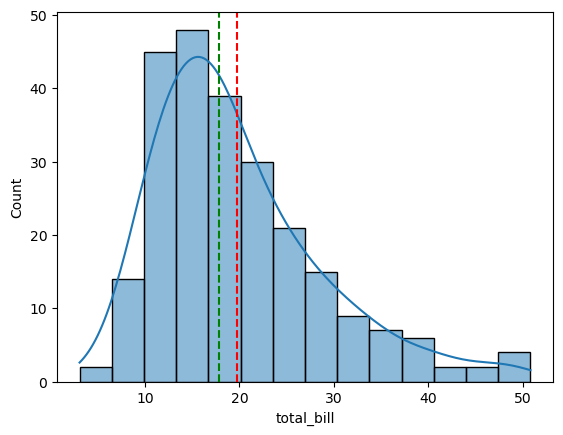

In [566]:
sns.histplot(df["total_bill"], kde=True)
plt.axvline(df["total_bill"].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df["total_bill"].median(), color='g', linestyle='--', label='Median')

### Interquartile Range

The interquartile range is a measure of the range of the middle 50% of the data. It is the difference between the 75th percentile and the 25th percentile. This is a measure of the spread of the data, and it is less sensitive to outliers than the range.  As with the median, we can use this to understand the spread of the data, but in a way that is less sensitive to outliers.

The interquartile range can be seen in a box plot, which is a visualization that shows the median, the interquartile range, and the range of the data, along with any outliers. In the plot below, the parts are as follows:
<ul>
<li> The box is the interquartile range, with the median as the line inside the box. </li>
<li> The whiskers are the range of the data, with the exception of any outliers. </li>
<li> The points are the outliers. </li>
</ul>

<Axes: >

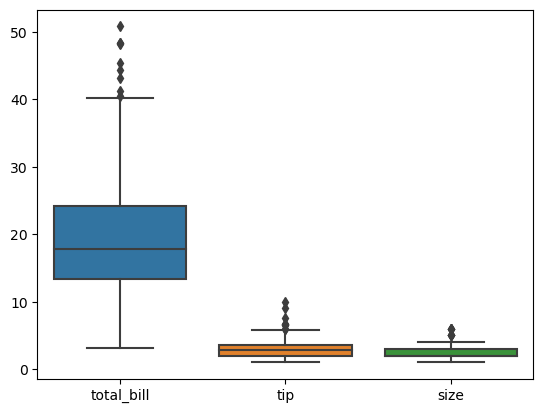

In [567]:
sns.boxplot(data=df)

## Log Transformation

Data that has the 'drag' to one side is called skewed. We can use some math to help us 'unskew' the data, which may help us make better predictions. This is a step called a transformation - we are applying some mathematical calculation to the data to change it to something that is better suited to our needs.

Target mean: 1.0025376996300006
Target median: 1.0646869552140226
Bill mean: 2.8903102613751135
Bill median: 2.8789171636936643


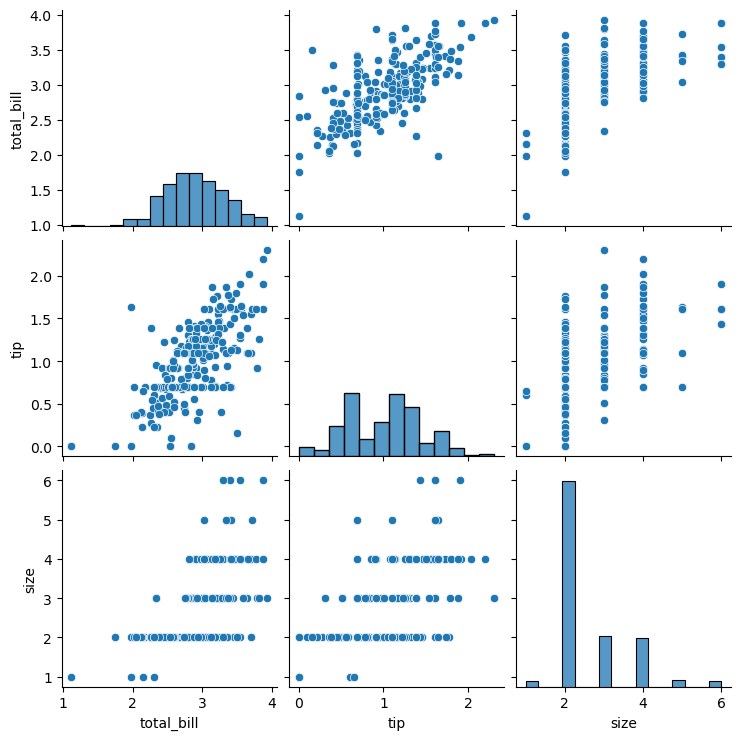

In [568]:
df_log = df.copy()
df_log["tip"] = np.log(df["tip"])
df_log["total_bill"] = np.log(df["total_bill"])
sns.pairplot(df_log)

print("Target mean:", df_log["tip"].mean())
print("Target median:", df_log["tip"].median())
print("Bill mean:", df_log["total_bill"].mean())
print("Bill median:", df_log["total_bill"].median())

<Axes: >

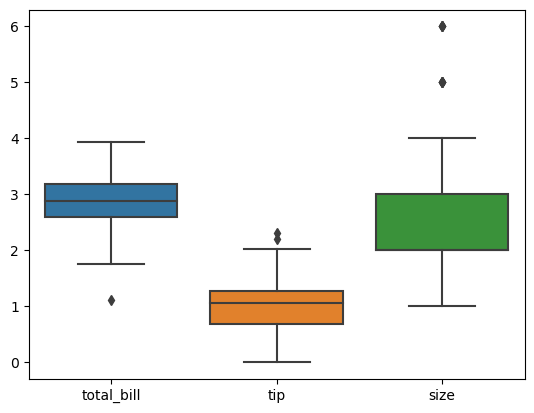

In [569]:
sns.boxplot(data=df_log)

In [570]:
df_log = df_log[df_log["total_bill"] > 1.1]
y_log = np.array(df_log["tip"]).reshape(-1, 1)
X_log = np.array(df_log[["total_bill", "size"]])
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)
model_log = SGDRegressor().fit(X_train_log, y_train_log.ravel())
print("Score in Training:", round(model_log.score(X_train_log, y_train_log), 3))
print("Score in Testing:", round(model_log.score(X_test_log, y_test_log), 3))

Score in Training: 0.375
Score in Testing: 0.342


### Results

After the transformation, we have data that is more normally distributed. This can help us make better predictions in <i>some</i> cases. The reason that this is an improvement is that the data after the transformation is more 'spread out' and spread out more evenly - there isn't a big 'clump' of data at one end. By doing this we effectively make the data into something that is more "machine learning friendly" in this case, and we see better results. 

<b>We are (virtually) never trying to do a series of "correct" steps to get to a "correct" answer when creating predictive models. Our goal is to create a model that is as accurate as possible in predicting the target variable, and it is totally OK for us to manipulate the data to help that happen. </b>

We should note that this is not a 'one size fits all' solution. We should always be looking at the data and the results to see if what we are doing is helping. In things involving income/money, these log transformations are often helpful. We do need to 'undo' the transformation to get the results back into the original scale, but that is a pretty simple thing to do.

In [571]:
# Generate predictions for the test data
y_log_pred = model_log.predict(X_test_log)
print("Raw Predictions:\n", y_log_pred[:5])
y_log_pred = np.exp(y_log_pred)
print("Real Predictions:\n", y_log_pred[:5])

Raw Predictions:
 [0.95455065 0.77626307 1.2778277  1.28944851 0.86233141]
Real Predictions:
 [2.59750314 2.17333547 3.58883523 3.63078367 2.36867662]


## Feature Scaling

The above types of transformations are somewhat common in real world usage, but the do require some understanding of the data and the problem. There are some other transformations that are more common, and are often used in a more 'automatic' way - variable scaling.

Feature scaling includes several similar methods of taking numerical values and transforming them to be on a different scale. There are several, a few we'll look at right now are:
<ul>
<li>Normalization - rescale the data so all values are between 0 and 1. 
<li>Standardization - rescale the data so there is a mean of 0 and a standard deviation of 1. 
</ul>

These all process our data in a similar way - taking the original data, and shifting its distribution using a transformation. The calculations for these scaling methods are:
<ul>
<li>Normalization: x = ( (x-min(x)) / (max(x)-min(x)) ) 
<li>Standardization: x = ( (x-mean(x)) / (std(x)) )
</ul>

![Scaling](../images/scaling.png "Scaling")

Note: There are other feature scaling algorithms/methods, these are just the two more common ones. The idea is pretty much always the same. One other consdieration is how the scaling treats outliers, which we'll worry about more next semester. 

![Standardization - Normalization](../images/norm_stand.jpeg "Standardization - Normalization")

<h3>OK.... Why?</h3>

Feature scaling has several benefits, the impact of these benefits varies widely depending on the exact original data, and the type of models you're using. The reasons are:
<ul>
<li>Scaling - different values may have widely different scales (e.g. if processing a loan, age and net worth will be very different). Scaling can sometimes cause problems with the relative impact of different ranges distorting calculations. Small values can be "drowned out" by larger values. 
<li>Range - similar to the scale problem, if data values are radically different, some calculations will become less accurate. This particularly can impact distance based calculations, like clustering. 
<li>Speed - with algorithms that use methods like gradient descent (like logistic regression), having values on different scales and ranges may cause the algorithm to take longer to converge on a solution, or potentially prevent it at all. 
</ul>

Feature scaling can improve predictive accuracy, sometimes dramatically. Scaling data is not super impactful in some calculations (linear regression, trees) and it can (can - not will) be very impactful in others (logistic regression, gradient descent, neural networks, PCA). In general, when we have an algorithm that is adjusting itself to try to find the most accurate solution (e.g. log. reg. with gradient descent), scaling the data helps and is pretty standard. When we get to things like neural networks later on, it is just part of the process. 

We will do this pretty often in machine learning applications, similar to encoding categorical varaibles it is kind of a preparatory step that we just do without thinking much about it because it makes things work (or work better).

<h3>Which Scaler to Pick?</h3>

There is not generally a definitive answer to that, and the real answer is to try a few and observe the results in accuracy. We do have a few rules of thumb:
<ul>
<li>Normalization: distribution is unkonwn, things need to be 0 to 1. 
<li>Standardization: distributions are normal(ish). 
</ul>

The real answer, is whichever performs the best. We'll look at tools to make the comparison a little more automatic later on.

## Using Scaling

We can use the `MinMaxScaler` and `StandardScaler` from `sklearn.preprocessing` to scale our data. They are pretty simple, and just involve a few simple steps. For each scaler we:
<ul>
<li> Create the scaler object. </li>
<li> Fit-transform the scaler to the <b>training</b> data. This establishes the scaling parameters (fit), and scales the training data (transform). </li>
<li> Transform the data. This scales the test data using the parameters from the training data. </li>
</ul>



In [572]:
# Try with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = SGDRegressor().fit( X_train_scaled, y_train.ravel())
print("Score in Training:", round(model_scaled.score(X_train_scaled, y_train), 3))
print("Score in Testing:", round(model_scaled.score(X_test_scaled, y_test), 3))

Score in Training: 0.482
Score in Testing: 0.356


In [573]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_scaled = SGDRegressor().fit( X_train_scaled, y_train.ravel())
print("Score in Training:", round(model_scaled.score(X_train_scaled, y_train), 3))
print("Score in Testing:", round(model_scaled.score(X_test_scaled, y_test), 3))

Score in Training: 0.421
Score in Testing: 0.35


In [574]:
scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)
model_log_scaled = SGDRegressor().fit( X_train_log_scaled, y_train_log.ravel())
print("Score in Training:", round(model_log_scaled.score(X_train_log_scaled, y_train_log), 3))
print("Score in Testing:", round(model_log_scaled.score(X_test_log_scaled, y_test_log), 3))

Score in Training: 0.468
Score in Testing: 0.442


In [575]:
scaler_log = MinMaxScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)
model_log_scaled = SGDRegressor().fit( X_train_log_scaled, y_train_log.ravel())
print("Score in Training:", round(model_log_scaled.score(X_train_log_scaled, y_train_log), 3))
print("Score in Testing:", round(model_log_scaled.score(X_test_log_scaled, y_test_log), 3))

Score in Training: 0.33
Score in Testing: 0.322


## Scaler Usage

Scaling is a pretty simple process, and it is extremely common in normal usage. For our simple linear regression here, the impact is not huge, but in other cases it can be dramatic. The largest impacts occur when we have algorithms that use several iterative steps to work towards a solution, which is most of them, as we'll see soon. The impact is also large when the ranges of the data are very different, which is also common in real world data.

Scaling variables, assuming you don't make some error, is a standard step and doesn't really have any downsides. It is a good habit to get into, and something that normally forms part of the pipeline of steps that we do to prepare our data.

## Exercise

This dataset has some features that are on different scales, I also added two versions of the target variable - one is the original, and one is the log of the original.
<ul>
<li> Predict MedHouseValOriginal using the features. </li>
<li> Predict MedHouseVal. </li>
</ul>

For each of these, <b>ensure that you drop the other target variable</b>, and scale the features using either the Standard or MinMax scaler. Try both, if you want to see which performs best here. Removing outliers is also a good idea! For example, this gets rid of both targets, and uses one as the one you're predicting:
```python

# Split the dataset into features (X) and target (y)
X = df_housing_test.drop(columns=['MedHouseValOriginal', 'MedHouseVal'])
y = df_housing_test['MedHouseValOriginal']

```

Use the SGDRegressor for the model, feel free to look up and test a few hyperparameters from the sklearn docs, but you can use it in its stock form. You can also compare to regular LinearRegression if you want to see the difference and have the time. 

<b>Note:</b> if the pairplots take a long time to run, you can use a subset of the data to speed things up. Use the .sample() function to do so. 

In [576]:
from sklearn.datasets import fetch_california_housing

# Load the California housing test dataset
data = fetch_california_housing(as_frame=True)

# Convert the dataset to a pandas DataFrame
df_housing_test = data.frame
df_housing_test["MedHouseValOriginal"] = np.exp(df_housing_test["MedHouseVal"])*10000
df_housing_test.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValOriginal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,923882.679178
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,360533.577189
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,338182.297902
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,303561.763221
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,306306.150307


#### Filtering Outliers Out Will Likely Help

##### Predict Original Value of Homes

##### Predict Log-Transformed Value of Homes

### Add Scaling

##### Predict Original Value of Homes

##### Predict Log-Transformed Value of Homes